In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, cohen_kappa_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [127]:
df = pd.read_csv('./data/BankChurners.csv')

In [128]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [129]:
df.shape

(10127, 23)

In [155]:
null_df = pd.DataFrame({'Null_Values': df.isna().sum().sort_values(ascending = False), 'Percentage': round((df.isna().sum())/(df.shape[0])*(100),2)})
null_df

,Null_Values,Percentage
Attrition_Flag,0,0.0
Avg_Open_To_Buy,0,0.0
Avg_Utilization_Ratio,0,0.0
CLIENTNUM,0,0.0
Card_Category,0,0.0
Contacts_Count_12_mon,0,0.0
Credit_Limit,0,0.0
Customer_Age,0,0.0
Dependent_count,0,0.0
Education_Level,0,0.0


In [130]:
df[df['Attrition_Flag'] == 'Attrited Customer'].Attrition_Flag.count()

1627

In [131]:
churn = df[df['Attrition_Flag'] == 'Attrited Customer']
churn

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,...,1438.3,0,1438.3,1.047,692,16,0.600,0.000,0.99616,0.003836
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,...,7882.0,605,7277.0,1.052,704,16,0.143,0.077,0.99780,0.002197
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,...,1438.3,808,630.3,0.997,705,19,0.900,0.562,0.99028,0.009720
54,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,...,15769.0,0,15769.0,1.041,602,15,0.364,0.000,0.99671,0.003294
61,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,...,34516.0,0,34516.0,0.763,691,15,0.500,0.000,0.99823,0.001771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,716893683,Attrited Customer,55,F,3,Uneducated,Single,Unknown,Blue,47,...,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172,0.99691,0.003088
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.99527,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.99788,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.99671,0.003294


In [132]:
women_total = df[df['Gender'] == 'F'].Gender.count()
women_total

5358

In [133]:
men_total = df[df['Gender'] == 'M'].Gender.count()
men_total

4769

In [134]:
women_churn = churn[churn['Gender'] == 'F'].Gender.count()
women_churn

930

In [135]:
men_churn = churn[churn['Gender'] == 'M'].Gender.count()
men_churn

697

In [104]:
# Churn rate

df[df.Attrition_Flag == 'Attrited Customer'].Gender.count()/df.Gender.count()*100

16.065962279055988

In [136]:
# Percent of Women in dataset

women_total/(women_total + men_total)*100

52.908067542213885

In [137]:
# Percent of Women in churn rate

women_churn/churn.Gender.count()*100

57.16041794714199

In [138]:
# Percent of Men in dataset

men_total/(women_total + men_total)*100

47.091932457786115

In [139]:
# Percent of Men in churn rate

men_churn/churn.Gender.count()*100

42.83958205285802

In [140]:
# Churn rate among women

women_churn/women_total*100


17.357222844344903

In [141]:
# Churn rate among men

men_churn/men_total*100

14.615223317257286

<AxesSubplot:>

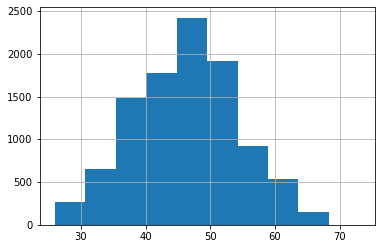

In [142]:
df.Customer_Age.hist()

<AxesSubplot:>

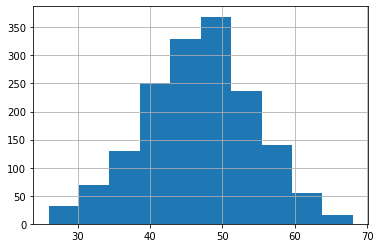

In [35]:
churn.Customer_Age.hist()

In [154]:
total_age, total_percent, churn_percent_age = [], [], []
for i in range(df.Customer_Age.min(),(df.Customer_Age.max()+1)):
    total_age.append(i)
    total_percent.append(df[df.Customer_Age == i].Customer_Age.count()/df.Customer_Age.count()*100)

for i in range(df.Customer_Age.min(),(df.Customer_Age.max()+1)):
    if df[df.Customer_Age == i].Customer_Age.count() == 0:
        churn_percent_age.append(0)
    else:
        churn_percent_age.append(churn[churn.Customer_Age == i].Customer_Age.count()/df[df.Customer_Age == i].Customer_Age.count())

total_percent = pd.DataFrame(total_percent)
total_percent['age'] = total_age
total_percent['percent_churn_by_age'] = churn_percent_age
total_percent.columns = ['percent_total', 'age', 'percent_churn_by_age']
total_percent = total_percent[['age', 'percent_total', 'percent_churn_by_age']]
total_percent

,age,percent_total,percent_churn_by_age
0,26,0.770218,0.076923
1,27,0.315987,0.093750
2,28,0.286363,0.034483
3,29,0.552977,0.125000
4,30,0.691221,0.214286
5,31,0.898588,0.142857
6,32,1.046707,0.160377
7,33,1.254073,0.157480
8,34,1.441691,0.130137
9,35,1.816925,0.114130


In [153]:
total_percent.percent_churn_by_age.sum()

7.032124140498507

In [20]:
churn

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,...,1438.3,0,1438.3,1.047,692,16,0.600,0.000,0.99616,0.003836
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,...,7882.0,605,7277.0,1.052,704,16,0.143,0.077,0.99780,0.002197
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,...,1438.3,808,630.3,0.997,705,19,0.900,0.562,0.99028,0.009720
54,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,...,15769.0,0,15769.0,1.041,602,15,0.364,0.000,0.99671,0.003294
61,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,...,34516.0,0,34516.0,0.763,691,15,0.500,0.000,0.99823,0.001771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,716893683,Attrited Customer,55,F,3,Uneducated,Single,Unknown,Blue,47,...,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172,0.99691,0.003088
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.99527,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.99788,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.99671,0.003294
